## Ejercicio 3. Método de Simpson

In [2]:
#Creamos la función simpson(f,a,b,e), donde f es la función dada, a y b son los extremos de integración y e es la longitud deseada para los subintervalos
function simpson(f,a,b,e)
    #Si e es la longitud deseada para los subintervalos, entonces el número de subintervalos será (b-a)/e para asegurar que sea entero usamos round() (como se muestra abajo), pero entonces el número de elementos en nuestra partición tiene que ser el número anterior más uno, de esta forma definimos h
    h=1+round((b-a)/e)
   #Definimos la lista de h elementos de "a" a "b" 
    list=linspace(a,b,h)
    #Definimos nuestro valor inicial
    int=0
    #El for es para ir sumando la contribución de cada intervalo a la integral
    for i in 2:length(list)
        #A int le vamos sumando el área debajo de cada parábola.
        
        int=int+((list[i]-list[i-1])/6)*(f(list[i-1])+4*f((list[i]+list[i-1])/2)+f(list[i]))
        
    end
        
    #La función regresa el valor de la integral
    return int    
end;

Ejemplos.

Consideremos las funciones $f(x)=x^5$ y $g(x)=e^{-3x}$

In [2]:
#Definimos las funciones
f(x)=x^5;
g(x)=e^(-3x);

In [3]:
#Probamos el método para f

simpson(f,-4,10,0.00004)

165983.9999999998

In [4]:
#Probamos el método para g

simpson(g,-3,5,0.0001)

2701.027975756533

## Ejercicio 4.  Interpolación de Lagrange

In [5]:
Pkg.add("SymPy");

INFO: Package SymPy is already installed
INFO: METADATA is out-of-date — you may not have the latest version of SymPy
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [5]:
using SymPy;

In [27]:
#Definimos la función Iterpolador(X,Y,x), cuyos argumentos son: X la lista de las abscisas; Y, la lista de las correspondientes ordenadas y x, el punto a evaluar.
function Interpolador(X,Y,x)
    #Definimos nuestra variable simbólica z
    z=Sym("z");
    #Vamos a ir guardando cada término en el polinomio pol, que definimos como 0 al inicio
    pol=0
    #El siguiente for es para ir tomando
    for j in 1:length(Y)
        l=1*z/z
        for m in 1:length(X)
            if j!=m
               l=l*(z-X[m])/(X[j]-X[m])
            end
        end
        pol=pol+Y[j]*l
    end
    pol=simplify(pol)
    L=lambdify(pol,[z])
    return L(x)
end;

#### Interpolación de $cos(x)$

In [7]:
#Definimos nuestro arrelgo de 10 puntos de 0 a 2pi
A=linspace(0,2pi,10);

In [8]:
#Definimos el arreglo del valor de la función cos(x) evaluada en el arreglo anterior
B=cos.(A);

In [28]:
#Vemos la forma explícita del polinomio
Interpolador(A,B,Sym("x"))

                     9                        8                         7     
5.6920614055489e-18*x  - 1.97979336359535e-5*x  + 0.000497576342935013*x  - 0.

                   6                        5                       4         
00411366974808214*x  + 0.00878850466172487*x  + 0.0243778891541915*x  + 0.0201

              3                      2                            
425548285172*x  - 0.512543349763835*x  + 0.003132547207505*x + 1.0

In [32]:
#Definimos la función que nos regresa el polinomio evaluado en x
interpcos(x)=Interpolador(A,B,x);

In [12]:
#Agregamos la librería Pyplot
Pkg.add("PyPlot")

INFO: Package PyPlot is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [1]:
#Declaramos su uso
using PyPlot

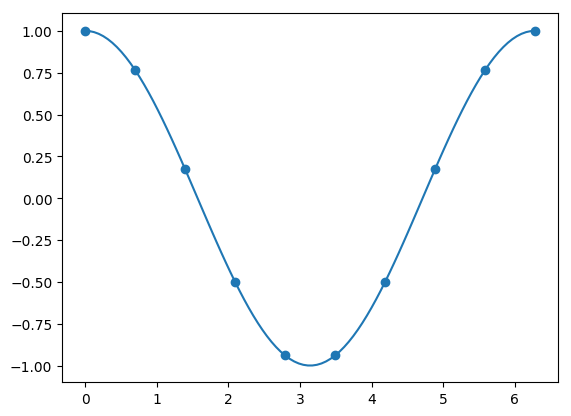

  likely near In[31]:6
  likely near In[31]:6
  likely near In[31]:6
in jprint at /home/juser/.julia/v0.6/SymPy/src/display.jl


In [31]:
#Usamos scatter para graficar los puntos interpolados
scatter(A,B)

#Dividimos el intervalo de 0 a 2pi en 100 puntos; y estos los evaluamos en el polinomio interpcos. Usamos plot para graficarlo.
a=linspace(0,2pi,100)
b=interpcos.(a)
plot(a,b)


show();

#### Interpolación de $cos^2(x)$

Usamos el mismo arreglo de 0 a 2pi, $A$.

In [14]:
A

0.0:0.6981317007977318:6.283185307179586

In [26]:
#Definimos el arreglo del valor de la función cos^2(x) evaluada en el arreglo anterior
C=(cos.(A)).^2

10-element Array{Float64,1}:
 1.0      
 0.586824 
 0.0301537
 0.25     
 0.883022 
 0.883022 
 0.25     
 0.0301537
 0.586824 
 1.0      

In [34]:
#Vemos la forma explícita del polinomio
Interpolador(A,C,Sym("x"))

                        9                        8                       7    
- 2.60208521396521e-18*x  + 0.00125598518133155*x  - 0.0315663505495105*x  + 0

                  6                    5                     4                
.313492883032325*x  - 1.5475381373856*x  + 3.89900431361716*x  - 4.56959608798

     3                     2                            
485*x  + 2.02232704563068*x  - 0.784017877200952*x + 1.0

In [35]:
#Definimos la función que nos regresa el polinomio evaluado en x
interpcos2(x)=Interpolador(A,C,x);

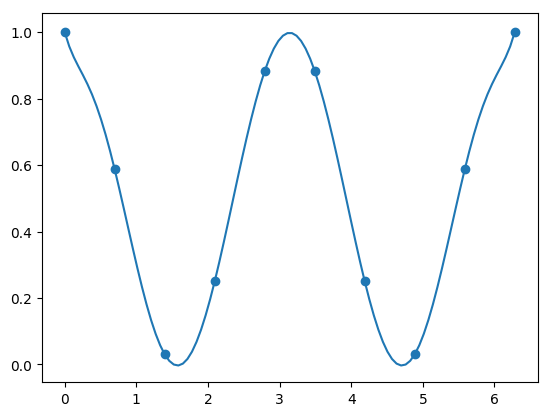

In [37]:
#Usamos scatter para graficar los puntos interpolados
scatter(A,C)

#Dividimos el intervalo de 0 a 2pi en 100 puntos; y estos los evaluamos en el polinomio interpcos. Usamos plot para graficarlo.
c=linspace(0,2pi,100)
d=interpcos2.(c)
plot(c,d)


show();

#### Interpolación de los puntos dados

In [40]:
#Definimos la lista de abscisas
xlist=[0,2,3,4,5,6,7]

7-element Array{Int64,1}:
 0
 2
 3
 4
 5
 6
 7

In [41]:
#Definimos la lista de las ordenadas
ylist=[10,-10,-4,0,5,20,-1]

7-element Array{Int64,1}:
  10
 -10
  -4
   0
   5
  20
  -1

In [43]:
#Aplicamos el método y vemos la forma explícita del polinomio

Interpolador(xlist,ylist,Sym("x"))

       6        5         4         3          2            
  173*x    113*x    4957*x    2731*x    54571*x    83*x     
- ------ + ------ - ------- + ------- - -------- + ---- + 10
   2520      84       504        84       1260      14      

In [45]:
#Definimos la funcion pol(x) que nos regresa el valor de Interpolador en x

pol(x)=Interpolador(xlist,ylist,x);

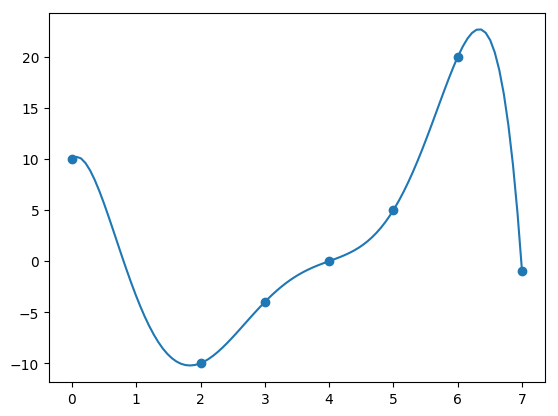

In [48]:
#Usamos scatter para graficar los puntos interpolados
scatter(xlist,ylist)

#Dividimos el intervalo de 0 a 7 en 100 puntos; y estos los evaluamos en el polinomio. Usamos plot para graficarlo.
j=linspace(0,7,100)
k=pol.(j)
plot(j,k)


show();

## Ejercicio 5

In [165]:
#Definimos la funcion

h(x)=-sin(x);

Necesitamos recordar nuestras rutinas para el método de Riemmann y el del trapecio, respectivamente.

In [166]:
#Creamos la función riemann(f,a,b,e), donde f es la función dada, a y b son los extremos de integración y e es la longitud deseada para los subintervalos
function riemann(f,a,b,e)
    #Si e es la longitud deseada para los subintervalos, entonces el número de subintervalos será (b-a)/e para asegurar que sea entero usamos round() (como se muestra abajo), pero entonces el número de elementos en nuestra partición tiene que ser el número anterior más uno, de esta forma definimos h
    h=1+round((b-a)/e)
   #Definimos la lista de h elementos de "a" a "b" 
    list=linspace(a,b,h)
    #Definimos nuestro valor inicial
    int=0
    #El for es para ir sumando la contribución de cada intervalo a la integral
    for i in 2:length(list)
        #A int le vamos sumando el área de cada rectángulo.
        int=int+(list[i]-list[i-1])*f((list[i]+list[i-1])/2)
    end
    #La función regresa el valor de la integral
    return int    
end;

In [167]:
#Creamos la función trapecio(f,a,b,e), donde f es la función dada, a y b son los extremos de integración y e es la longitud deseada para los subintervalos
function trapecio(f,a,b,e)
    #Si e es la longitud deseada para los subintervalos, entonces el número de subintervalos será (b-a)/e para asegurar que sea entero usamos round() (como se muestra abajo), pero entonces el número de elementos en nuestra partición tiene que ser el número anterior más uno, de esta forma definimos h
    h=1+round((b-a)/e)
   #Definimos la lista de h elementos de "a" a "b" 
    list=linspace(a,b,h)
    #Definimos nuestro valor inicial
    int=0
    #El for es para ir sumando la contribución de cada intervalo a la integral
    for i in 2:length(list)
        #A int le vamos sumando el área de cada trapecio.
        int=int+(list[i]-list[i-1])*((f(list[i])+f(list[i-1]))/2)
    end
    #La función regresa el valor de la integral
    return int    
end;

Consideremos las siguientes funciones que nos dan el valor de la integral de $h(x)$ de $0$ a $2\pi$ (usando el respectivo método), en función de $e$, el ancho de la celda.

In [168]:
R(x)=riemann(h,0,2pi,x);

In [169]:
T(x)=trapecio(h,0,2pi,x);

In [170]:
S(x)=simpson(h,0,2pi,x);

Ahora grafiquemos el valor de las integrales, respecto al inverso del ancho de la celda.

In [171]:
delta=zeros(200)
for i in 1:length(delta)
    delta[i]=2pi/i
end

In [175]:
recip=(delta).^(-1);

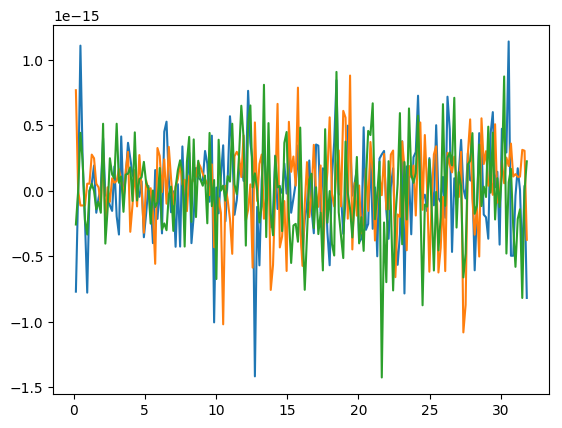

In [173]:
rlist=R.(delta)
tlist=T.(delta)
slist=S.(delta)
plot(recip,rlist)
plot(recip,tlist)
plot(recip,slist)
show();
